In [1]:
%run ../common/import_all.py

from common.setup_notebook import set_css_style, setup_matplotlib, config_ipython
config_ipython()
setup_matplotlib()
set_css_style()

# Probability functions, and histogramming data

How probability is best formalised and represented, mathematically as well as visually, depends on the type of data you have. 

In the following, we will use $X$ to indicate a random variable taking values in space $\Omega$. To mathematically express probabilities attached to certain values in $\Omega$, people use the *probability mass function* in the case of discrete variables and *probability density functions* in the case of continuous variables. Let's see them both.

## The Probability Mass Function

The *probability mass function*, aka **pmf**, expresses, at each possible value of a discrete random variable, the probability related to it. We'll call it $p_m$. So, the pfm expresses the probability that $X$ takes a given value $x$:

$$
p_m(x) = P(X=x) \ ,
$$

and by normalisation property of probability it obeys

$$
\sum_{x \in \Omega} p_m(x) = 1
$$

## The Probability Density Function

The **pdf**, *probability density function*, which we'll here call $p_d(x)$, expresses the probability for a continuous random variable $X$ to take values within a certain range, so it is effectively a density of probability.

What this means is that taken range of values $[x_a, x_b]$, we have 

$$
P(x_a \leq X \leq x_b) = \int_{x_a}^{x_b} \text{d} x \ p_d(x) \ ,
$$

and by the normalisation property of probability we have

$$
\int_\Omega \text{d} x \ p_d(x) = 1
$$

## Histograms to display distributions

Histogramming data means segmenting it into ranges (*bins*) and counting how many data points fall in each range. It is what you typically do when you have some real-world data and you need to understand how it is distributed.

### A uniform distribution

Let's say we uniformly extract $10^5$ integer data points in the interval $[0, 10)$:

In [2]:
n = 100000

data = [random.randint(0, 9) for i in range(n)]

and then let's compute, for each of the 10 possible values, how many of these points are there, which is equivalent to say that we are binning with a bin width of 1:

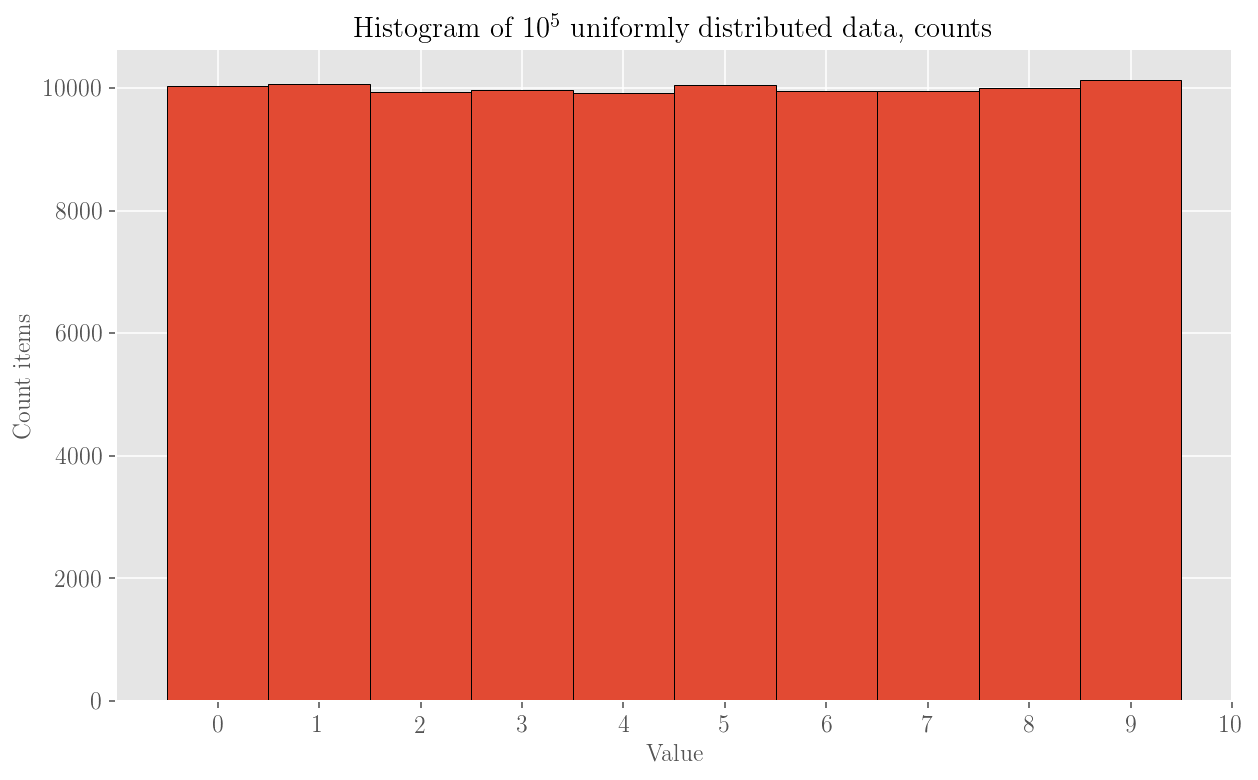

In [3]:
bins = np.arange(0, 11, 1)

# Count the number of items falling in each bin
bin_counts = [data.count(item) for item in range(0, 10)]
    
plt.bar(range(0, 10), bin_counts, width=1, edgecolor='k')
plt.xticks(bins)
plt.title('Histogram of $10^5$ uniformly distributed data, counts')
plt.xlabel('Value')
plt.ylabel('Count items')
plt.show();

It's plain visible that bins contain pretty much the same number of values, namely around $10^4$, which is our total divided by the number of bins itself. Indeed, the difference between the highest and the lowest counts in a bins is

In [4]:
max(bin_counts) - min(bin_counts)

210

corresponding to a proportion of the total number of points equal to 

In [5]:
(max(bin_counts) - min(bin_counts) ) / n

0.0021

very little!

This histogram is doing a good job in showing us the data is uniformly distributed. What we have shown is, again, the *number* of values in each bin, which is not the probability. 

In order to have a PMF instead, we'd have to ideally take, for each of the values extracted, its count and then divide it by the total number of values to obtain frequency counts. Note that these are the probabilities of each possible value and they sum up to 1:

In [6]:
freq_counts = [item / n for item in bin_counts]
sum(freq_counts)

1.0

Then we can easily plot them to obtain the PMF histogram:

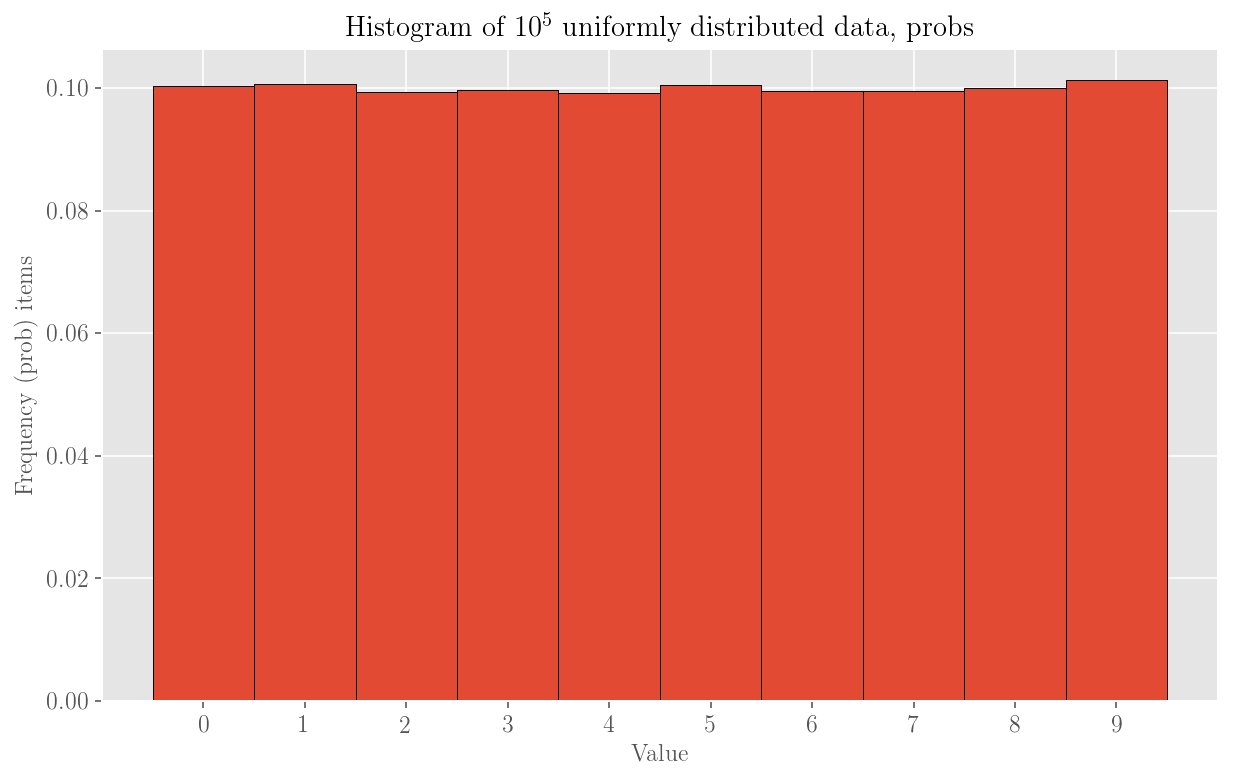

In [7]:
plt.bar(range(0, 10), freq_counts, width=1, edgecolor='k')
plt.xticks(range(0, 10))
plt.title('Histogram of $10^5$ uniformly distributed data, probs')
plt.xlabel('Value')
plt.ylabel('Frequency (prob) items')
plt.show();

### A gaussian distribution

Now let's consider a gaussian distribution instead, taking the same amount ($10^5$) of numbers and plotting the bins counts again. This time we extract float numbers, randomly sampled from a gaussian distribution of mean 0 and standard deviation 1. We then separate the range in 20 bins and plot the histogram of the counts of each bin as above. We use a line to signify that effectively our variable is meant to be continuous.

We attribute counts for a bin to the middle point of the bin.

In [8]:
data = np.random.normal(size=n)

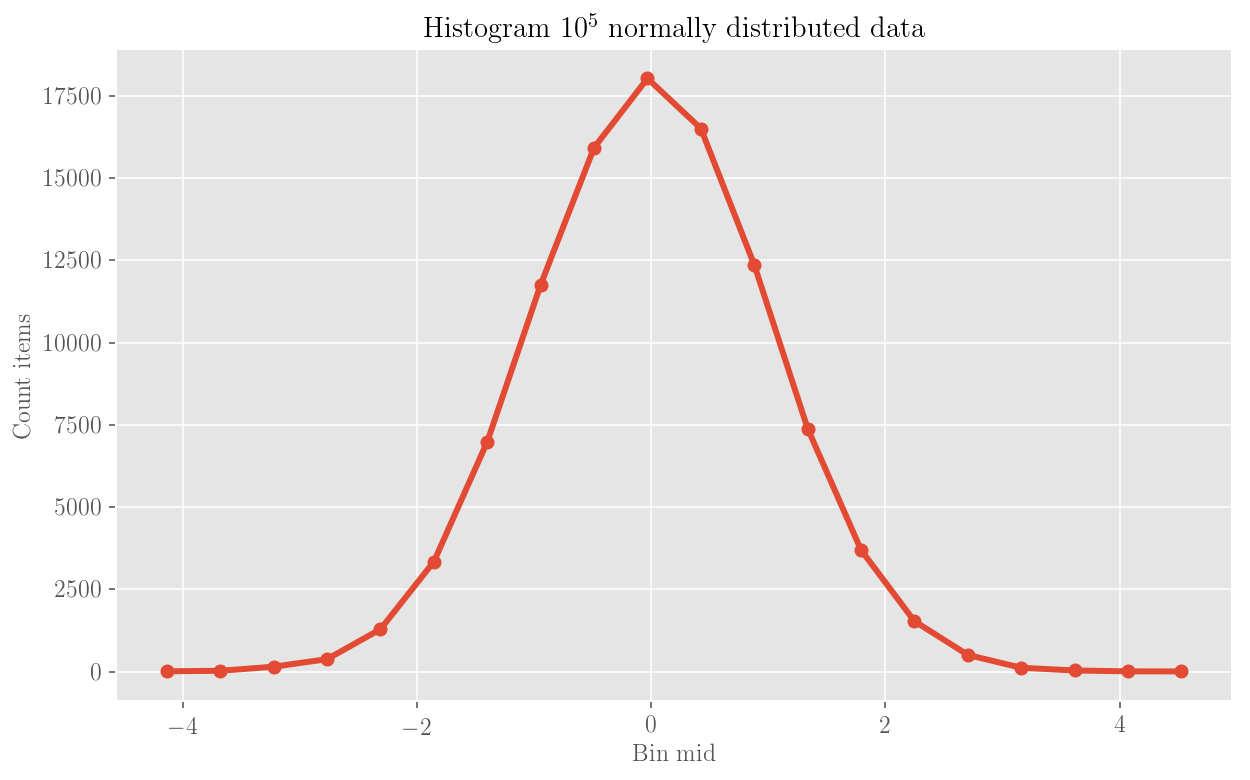

In [9]:
bins = 20                                                                            # choose to separate into 20 bins
hist = np.histogram(data, bins=bins)
hist_vals, bin_edges = hist[0], hist[1]
bin_mids = [(bin_edges[i] + bin_edges[i+1])/2 for i in range(len(bin_edges) -1)]     # mids of bins again
  
plt.plot(bin_mids, hist_vals, marker='o')
plt.title('Histogram $10^5$ normally distributed data')
plt.xlabel('Bin mid')
plt.ylabel('Count items')
plt.show();

Each bin is large

In [10]:
bin_edges[1] - bin_edges[0]

0.4559794297232318

So, it is quite clear from the plot that the mean is indeed at 0. We can also do the same histogram but showing the pdf instead:

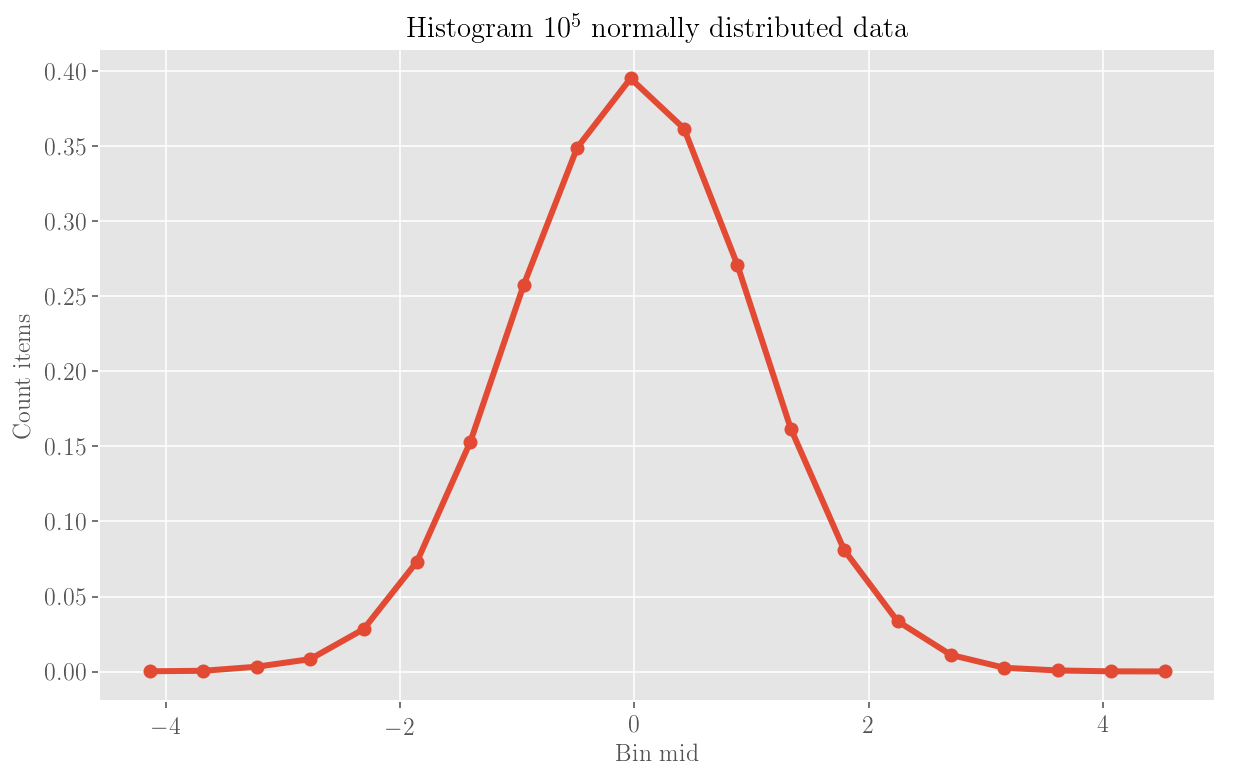

In [11]:
bins = 20
hist = np.histogram(data, bins=bins, density=True)
hist_vals, bin_edges = hist[0], hist[1]
bin_mids = [(bin_edges[i] + bin_edges[i+1])/2 for i in range(len(bin_edges) -1)]

plt.plot(bin_mids, hist_vals, marker='o')
plt.title('Histogram $10^5$ normally distributed data')
plt.xlabel('Bin mid')
plt.ylabel('Count items')
plt.show();

Because what we plotted above here^ is a density of probability, what sums up to 1 is not those values but the product of value times the bin width:

In [12]:
sum([(bin_edges[i+1] - bin_edges[i]) * hist_vals[i] for i in range(len(hist_vals))])

1.0

Effectively indeed, if we take for instance the first bin, its density represents the probability of being in that bin divided by the bin width itself, which is:

In [13]:
hist_vals[0]

0.00015351569706222989

## Using boxplots

Another very useful and quite comprehensive way to display distributions is through the use of *boxplots*. Boxplots let you see, in one go, the quartiles, the mean and the potential outliers in a distribution.

To start off with, let's generate $10^5$ random numbers extracting them from a (in order):

* uniform distribution
* gaussian distribution with mean 0 and standard deviation 1
* exponential distribution
* Zipf distribution $\propto x^{-2}$

Let's set the styles of our boxplots: the mean will be a red romboid point, the median a red line, the outliers blue circles.

Also, we identify as outliers those points which exceed the first or the third quartiles (on the respective sides) by 1.5 their value, according to [Tukey's criterion](http://www.physics.csbsju.edu/stats/box2.html).

Following on, we create boxplots for each of our distributions.

In [25]:
# Extract the random points

n = 100000                                                             # the number of points to extract

u = np.random.uniform(size=n)
g = np.random.normal(size=n)                                           # gaussian
e = np.random.exponential(size=n)                                      # exponential
z = np.random.zipf(a=2, size=n)                                        # Zipf (power-law) x^{-2}

In [26]:
# Set style of the plot

# Style of the point for the mean
meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor='firebrick')

# Style of the outliers points
flierpointprops = dict(marker='o', markeredgecolor='blue', linestyle='none')

# Style of the median line
medianlineprops = dict(linewidth=2.5, color='firebrick')

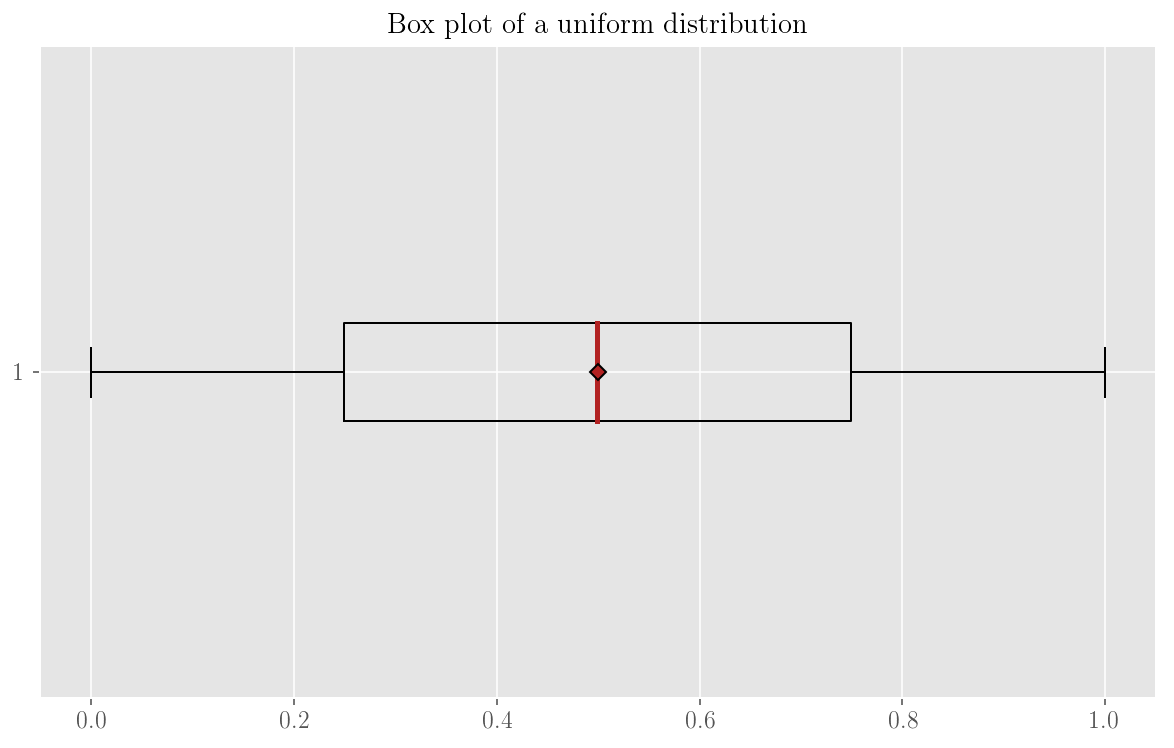

In [27]:
# Uniform distribution

ax = plt.subplot()

ax.boxplot(u, whis=1.5, showmeans=True, vert=False,
           meanprops=meanpointprops, flierprops=flierpointprops, medianprops=medianlineprops)

plt.title('Box plot of a uniform distribution')
plt.show();

Clearly the mean is in the middle of values and there are no outliers.

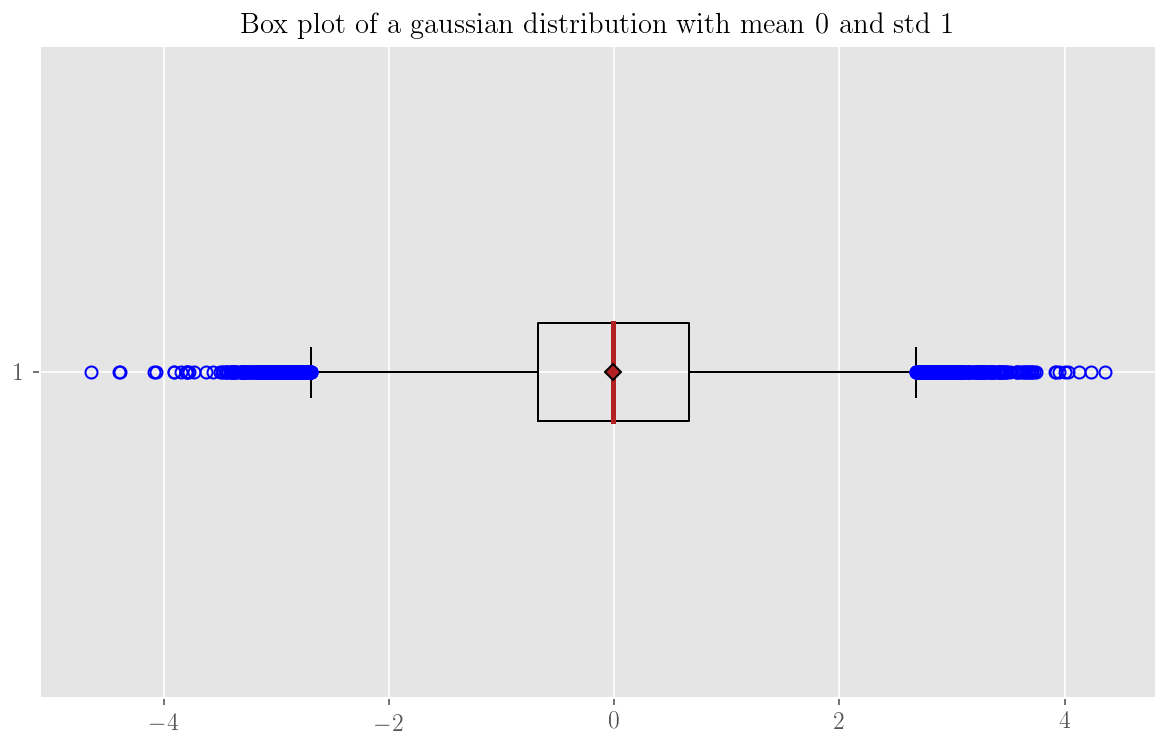

In [28]:
# The gaussian distribution

ax = plt.subplot()

ax.boxplot(g, whis=1.5, showmeans=True, vert=False,
           meanprops=meanpointprops, flierprops=flierpointprops, medianprops=medianlineprops)

plt.title('Box plot of a gaussian distribution with mean 0 and std 1')
plt.show();

The symmetrical tail of "outliers" is visibile.

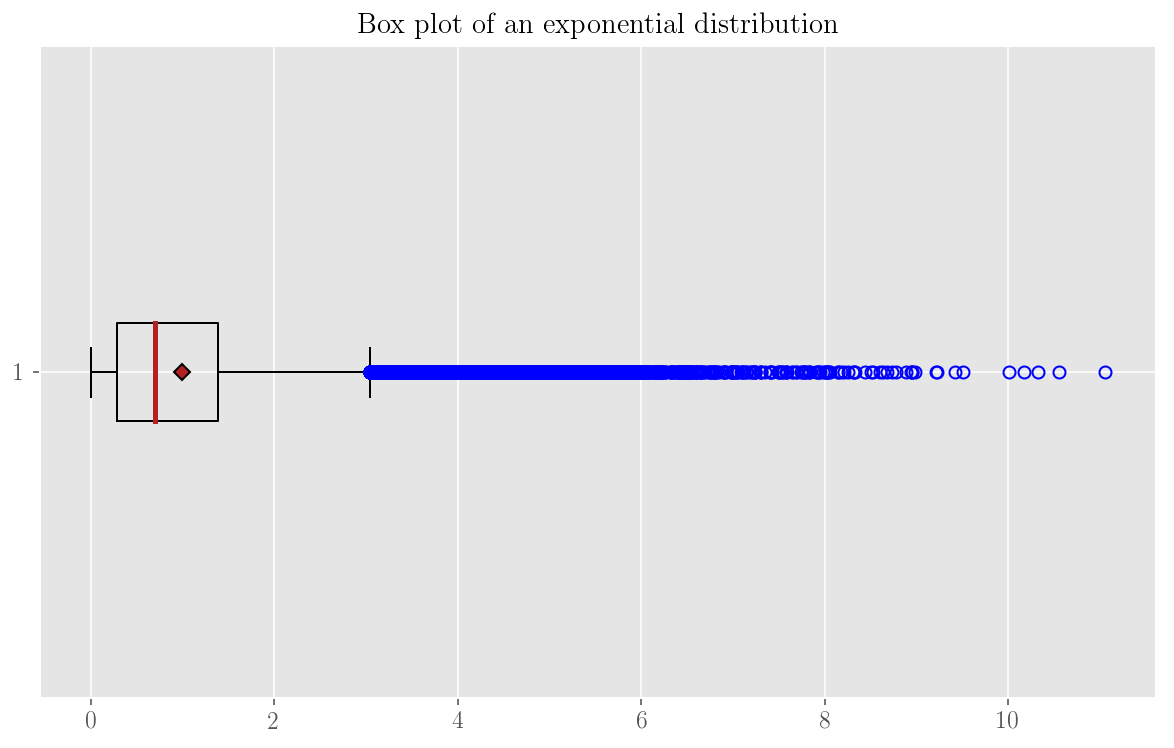

In [30]:
# The exponential distribution

ax = plt.subplot()

ax.boxplot(e, whis=1.5, showmeans=True, vert=False,
           meanprops=meanpointprops, flierprops=flierpointprops, medianprops=medianlineprops)

plt.title('Box plot of an exponential distribution')
plt.show();

This time the distribution is heavily non-symmetrical and the tail of exceeding values is clear.

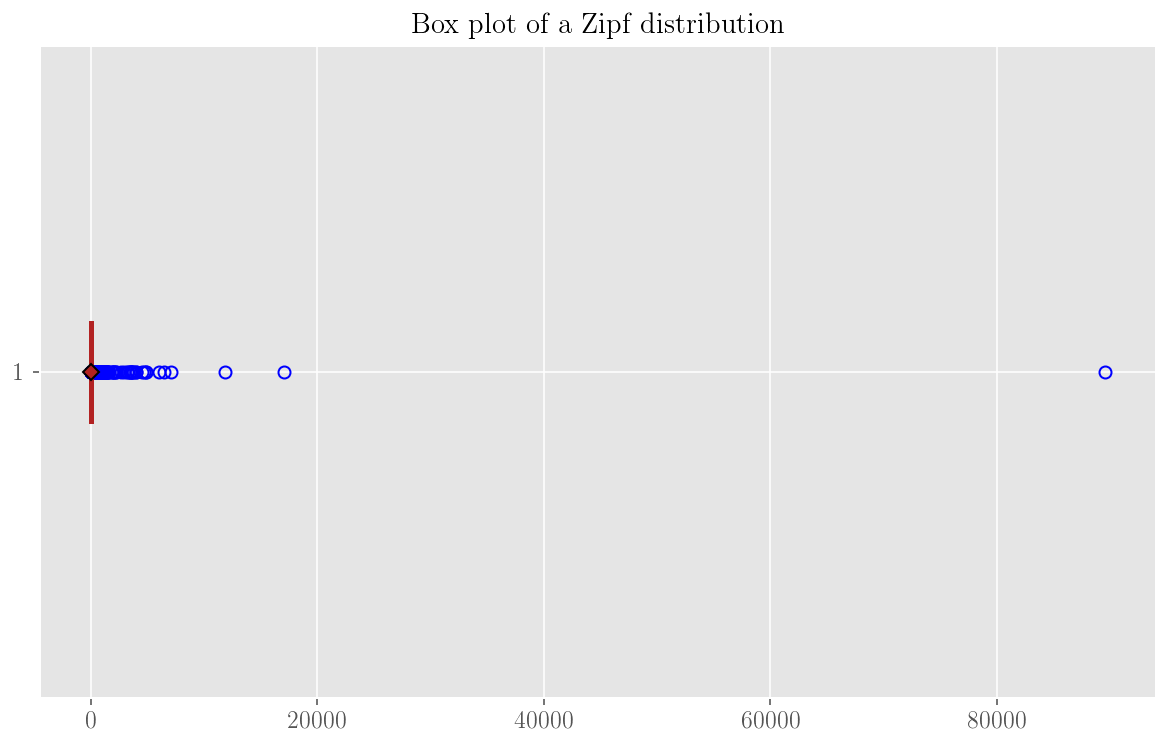

In [31]:
# The Zipf distribution

ax = plt.subplot()

ax.boxplot(z, whis=1.5, showmeans=True, vert=False,
           meanprops=meanpointprops, flierprops=flierpointprops, medianprops=medianlineprops)

plt.title('Box plot of a Zipf distribution')
plt.show();

It's a heavy-tail distribution, the quartiles are very close with respect to the full span of points.